In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data

In [8]:
df = pd.read_csv('datasets.csv', encoding_errors='ignore')

In [3]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


#### Data Exploration

In [4]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
988,6.130000e+17,Condo in Brooklyn · 1 bedroom · 1 bed · 1 shar...,401709949,Daniela & James,Brooklyn,Bedford-Stuyvesant,40.698250,-73.938670,Private room,37.0,...,05/08/23,0.22,31.0,263.0,2.0,No License,No rating,1,1,1
18276,6.800000e+17,Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...,364844663,Pamela,Brooklyn,Bedford-Stuyvesant,40.682766,-73.923686,Entire home/apt,265.0,...,02/09/23,0.45,4.0,332.0,5.0,No License,5,1,1,1
17910,8.590000e+17,Rental unit in New York · ★4.73 · 1 bedroom · ...,507824216,Mohin,Manhattan,East Village,40.722456,-73.979313,Entire home/apt,120.0,...,06/12/23,3.07,4.0,270.0,26.0,No License,4.73,1,3,1
1353,9.540000e+17,Serviced apartment in New York · 1 bedroom · 1...,162280872,Urban Furnished,Manhattan,Gramercy,40.734526,-73.980999,Entire home/apt,160.0,...,10/11/23,0.53,256.0,365.0,1.0,No License,No rating,1,1,1
20544,6.030000e+17,Condo in Brooklyn · ★5.0 · 1 bedroom · 1 bed ·...,401709949,Daniela & James,Brooklyn,Bedford-Stuyvesant,40.697920,-73.940570,Private room,37.0,...,18/12/23,0.18,31.0,337.0,2.0,No License,5,1,1,1


In [5]:
df.shape

(20770, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


#### Data Cleaning

In [9]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [ ]:
#Drpping all the rows that encounters null value
df.dropna(inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [11]:
#Dropping duplicated rows
df.duplicated().sum()

np.int64(12)

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

#### Type Casting

In [15]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [16]:
# There is no use of keeping host id and id as number format, because we don't use it. So we are converting into object data type

df['id'] = df['id'].astype(object)
df['host_id'] = df['host_id'].astype(object)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

### EDA

#### Univariate Analysis

<Axes: xlabel='price', ylabel='Count'>

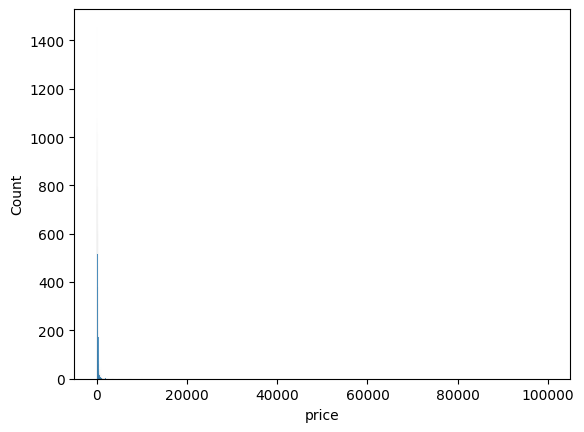

In [17]:
# Price Distribution
sns.histplot(data=df,x='price')

It's very hard to understand the the distribution from the above plot, because there are some ouliers in 100000 range

<Axes: xlabel='price'>

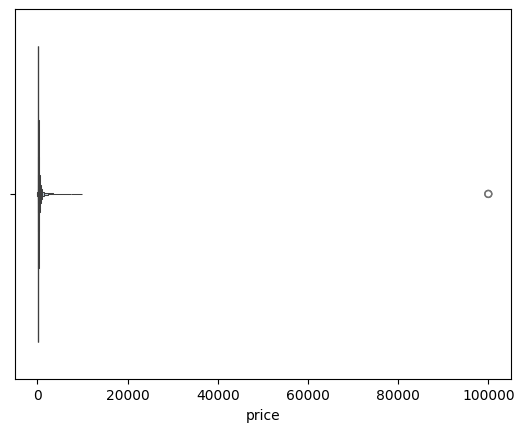

In [18]:
sns.boxenplot(data=df,x='price')

<Axes: xlabel='price'>

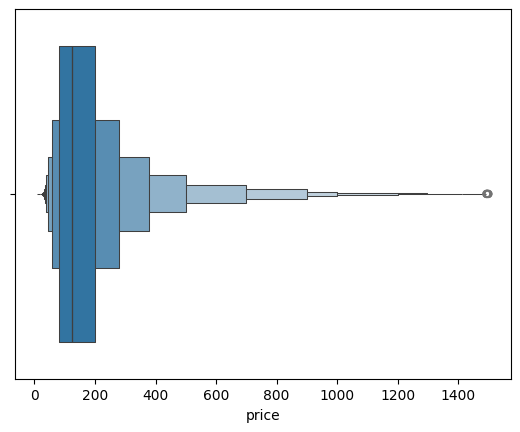

In [19]:
#Removing outliers
data = df[df['price'] < 1500]

sns.boxenplot(data=data,x='price')

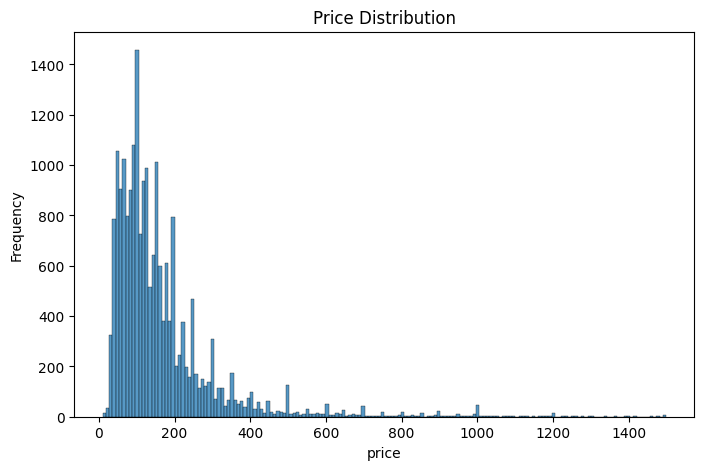

In [34]:
plt.figure(figsize=(8,5))
plt.title("Price Distribution")
plt.ylabel('Frequency')
sns.histplot(data=data,x='price')
plt.show()

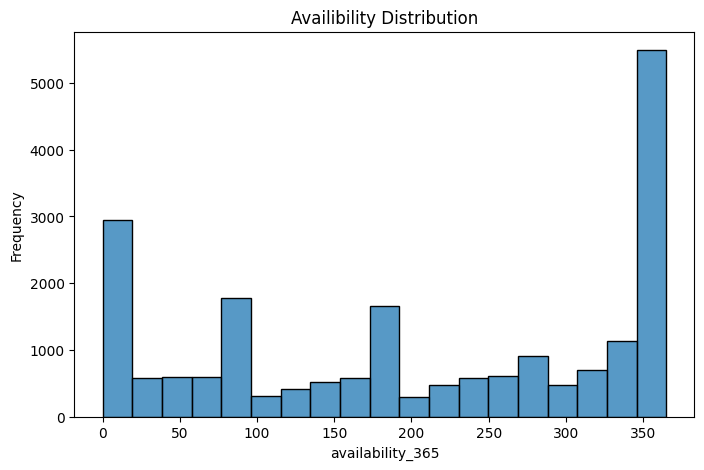

In [31]:
plt.figure(figsize=(8,5))
plt.title("Availibility Distribution")
plt.ylabel('Frequency')
sns.histplot(data=data,x='availability_365')
plt.show()

In [23]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [37]:
df = data

In [38]:
data.shape

(20636, 22)

In [39]:
df.shape

(20636, 22)

In [40]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

chekcing the price in each neigborhood group 

In [43]:
df.groupby(by='neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        204.146014
Brooklyn         155.138317
Queens           121.681939
Staten Island    118.780069
Bronx            107.990506
Name: price, dtype: float64

#### Feature Engineering

In [46]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [47]:
# Price per bed

df['price per bed'] = df['price']/df['beds']
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11296\2259178743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price per bed'] = df['price']/df['beds']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


average price per bed in each neighbourhood gorup

In [48]:
df.groupby(by='neighbourhood_group')['price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

#### Bivariate Analysis

one variable dependecy in antoher variable

In [49]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

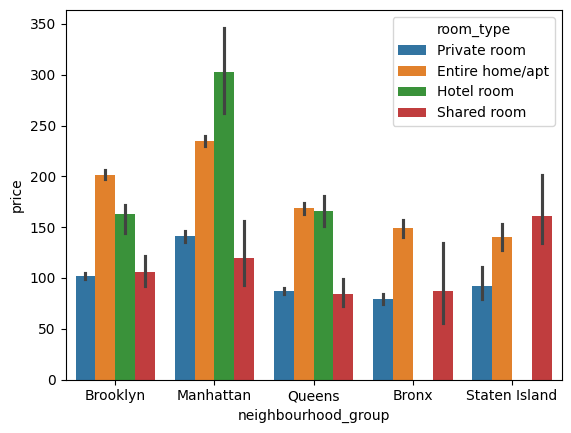

In [ ]:
# Price dependency on neigborhood group
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')

<Axes: title={'center': 'Locality and reviwe dependencies'}, xlabel='number_of_reviews', ylabel='price'>

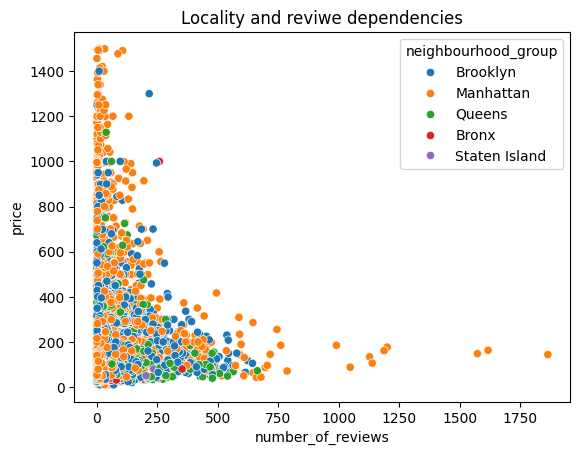

In [55]:
# Number of reviews and price relationship
plt.title("Locality and reviwe dependencies")
sns.scatterplot(data=df,x='number_of_reviews',y='price',hue='neighbourhood_group')

In [56]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

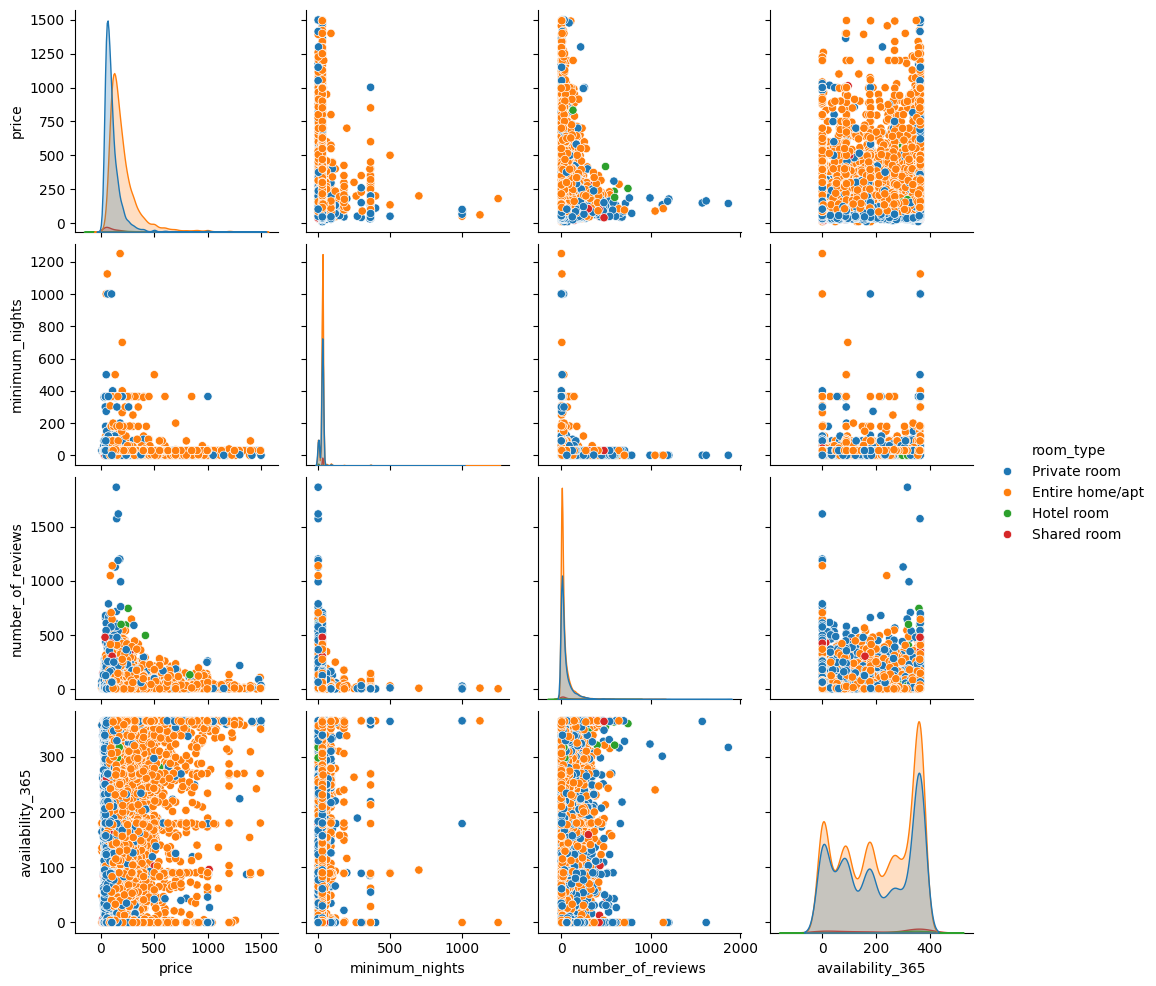

In [58]:
sns.pairplot(data=df,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')

<Axes: xlabel='longitude', ylabel='latitude'>

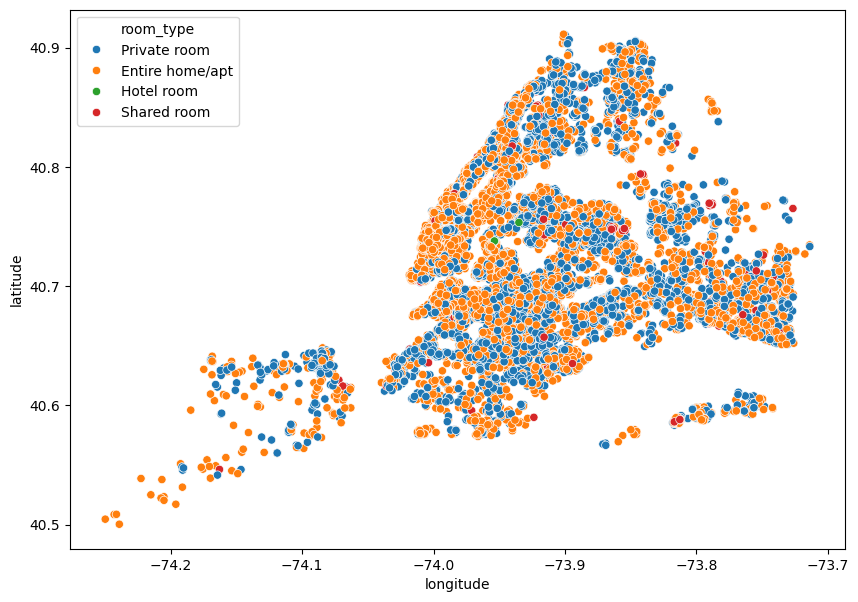

In [59]:
# Geographical Distribution of AirBnb Listing
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')

In [60]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

In [ ]:
# Correlation
corr = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


<Axes: >

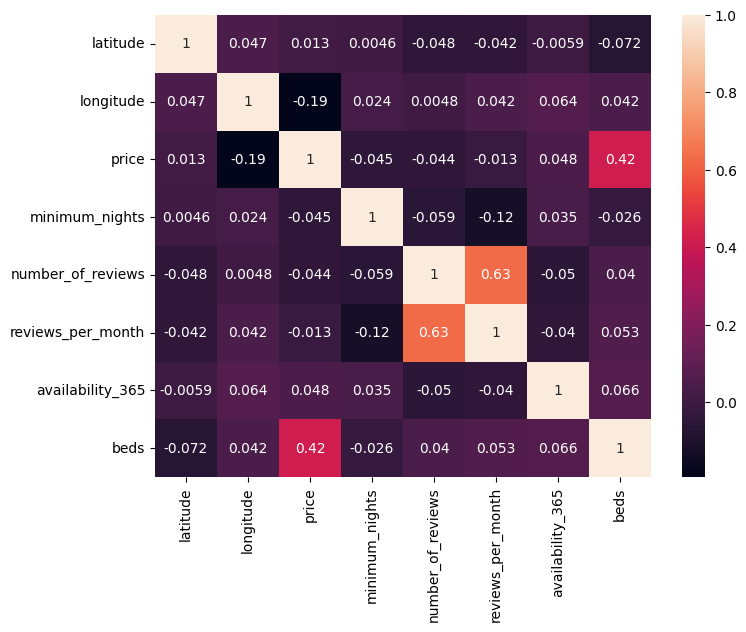

In [62]:
# HeatMap - correlation of one varible with others for numerical column
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True)

In [63]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


<Axes: xlabel='room_type', ylabel='price'>

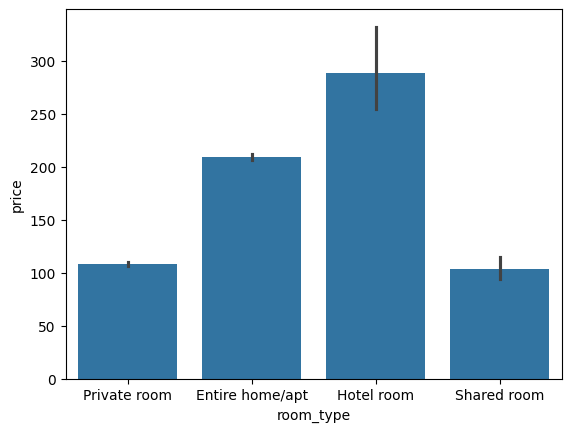

In [64]:
# Checking how much price renges according to the room type
sns.barplot(data=df,x='room_type',y='price')

In [65]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

We are going to find out inactive rooms. So that we find out the hosts and encoourage them by giving promotions,etc.

In [73]:
inactive_rooms = df[df['availability_365'] == 0]
len(inactive_rooms)

2473

In [78]:
inactive_room_in_neighbor_grp = inactive_rooms['neighbourhood_group'].value_counts()
inactive_room_in_neighbor_grp

neighbourhood_group
Manhattan        1048
Brooklyn          888
Queens            439
Bronx              78
Staten Island      20
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

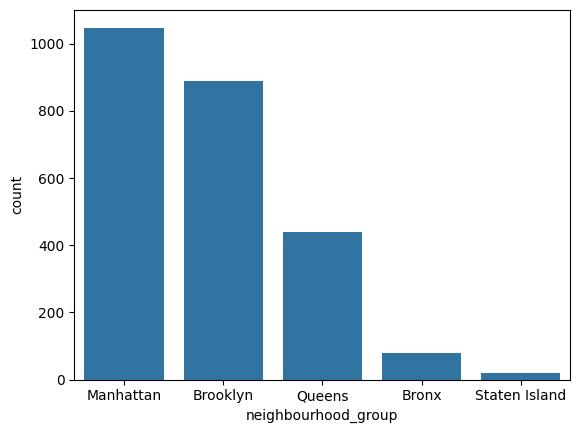

In [83]:
# visualizing the inactive rooms in neighbourhood_group
sns.countplot(data=inactive_rooms, x='neighbourhood_group',order=inactive_room_in_neighbor_grp.index)

finding out the hosts who is not providing the rooms

In [86]:
inactive_rooms['host_name'].value_counts()

host_name
David           44
Shoreham        43
Sonder (NYC)    19
Michael         16
Eugene          16
                ..
Jill             1
Federica         1
Zahira           1
Paola            1
Yehudah          1
Name: count, Length: 1443, dtype: int64

In [88]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

In [99]:
df['rating'].unique()

array(['5', '4.67', '4.17', '4.64', '4.91', '4.33', '4.5', '4.79',
       'No rating', '4.71', '3.2', '4.8', '4.65', '4.75', '4.89', '4.43',
       '4.82', '4.69', '4.11', '4.9', '4.74', '4.87', '3.67', '4.94',
       '4.66', '4.58', '4.95', '4.78', '4.83', '4.73', '4.53', '4.15',
       '4.45', '4.46', '4.86', '4.42', '4.81', '3.84', '4.27', '4.21',
       '4.93', '4.61', '4.77', '4.4', '4.76', '4.7', '4.6', '4.96',
       '4.56', '3.6', '3', '3.82', '4.92', '4.85', '4', '4.97', '4.63',
       '4.38', '4.72', '4.25', '4.68', '4.99', '4.2', '4.54', '4.88',
       '4.59', '4.57', '4.18', '4.62', 'New ', '4.98', '3.33', '4.29',
       '3.4', '4.44', '4.36', '3.75', '4.22', '4.55', '4.26', '3.92',
       '4.3', '4.12', '4.06', '4.51', '2.33', '4.84', '4.47', '4.39',
       '4.41', '4.35', '3.88', '3.86', '4.07', '4.52', '4.49', '4.23',
       '4.31', '4.13', '3.5', '3.8', '4.32', '3.79', '4.19', '4.16',
       '2.83', '4.48', '3.71', '3.36', '4.14', '3.25', '3.89', '4.1',
       '4.09', '

In [100]:
df['rating'] = df['rating'].str.strip()

In [102]:
df['rating'].unique()

array(['5', '4.67', '4.17', '4.64', '4.91', '4.33', '4.5', '4.79',
       'No rating', '4.71', '3.2', '4.8', '4.65', '4.75', '4.89', '4.43',
       '4.82', '4.69', '4.11', '4.9', '4.74', '4.87', '3.67', '4.94',
       '4.66', '4.58', '4.95', '4.78', '4.83', '4.73', '4.53', '4.15',
       '4.45', '4.46', '4.86', '4.42', '4.81', '3.84', '4.27', '4.21',
       '4.93', '4.61', '4.77', '4.4', '4.76', '4.7', '4.6', '4.96',
       '4.56', '3.6', '3', '3.82', '4.92', '4.85', '4', '4.97', '4.63',
       '4.38', '4.72', '4.25', '4.68', '4.99', '4.2', '4.54', '4.88',
       '4.59', '4.57', '4.18', '4.62', 'New', '4.98', '3.33', '4.29',
       '3.4', '4.44', '4.36', '3.75', '4.22', '4.55', '4.26', '3.92',
       '4.3', '4.12', '4.06', '4.51', '2.33', '4.84', '4.47', '4.39',
       '4.41', '4.35', '3.88', '3.86', '4.07', '4.52', '4.49', '4.23',
       '4.31', '4.13', '3.5', '3.8', '4.32', '3.79', '4.19', '4.16',
       '2.83', '4.48', '3.71', '3.36', '4.14', '3.25', '3.89', '4.1',
       '4.09', '4

we have to convert the rating column into float, but there 2 string values "New" and "No rating"

In [103]:
df[(df['rating'] == "New") | (df['rating'] == 'No rating')]['rating'].count()

np.int64(3727)

In [105]:
# Replacing it with 0
df['rating'] = df['rating'].replace({"New": '0' ,"No rating":'0'})

In [106]:
df['rating'] = df['rating'].astype(float)

In [121]:
high_rating_threshold = 4
high_reviews_threshold = 10
low_price_threshold = df['price'].quantile(0.25)

high_performing_listings = df[(df['rating'] > high_rating_threshold) & 
                              (df['number_of_reviews'] > high_reviews_threshold) &
                              (df['price'] < low_price_threshold)]


print(high_performing_listings['id'].nunique() ,"rooms are performing well")

2280 rooms are performing well
